In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

mat_content = sio.loadmat( 'face(1).mat' )

face_data = mat_content[ 'X' ]

face_data_labels = mat_content[ 'l' ]

print( 'Face Data Shape: {}'.format( face_data.shape ) )
print( 'Face Data Labels Shape: {}'.format( face_data_labels.shape ) )

faceDataLabeled = np.vstack( ( face_data, face_data_labels ) )

print( 'Face Data Labeled Shape: {}'.format( faceDataLabeled.shape ) )

Face Data Shape: (2576, 520)
Face Data Labels Shape: (1, 520)
Face Data Labeled Shape: (2577, 520)


In [2]:
#Randomized Train test Split 42
train_label, test_label = train_test_split( faceDataLabeled.T, test_size = 0.3, random_state = 23 )
#Stratified Train test Split
# train_label, test_label = train_test_split( face_data.T, stratify = face_data_labels, test_size= 0.2 )

train_label = train_label.T.astype( 'float64' )
test_label  = test_label.T.astype( 'float64' )

print( 'Shape of Train Set {}'.format( train_label.shape ) )
print( 'Shape of Test Set {}'.format( test_label.shape ) )

Shape of Train Set (2577, 364)
Shape of Test Set (2577, 156)


[797. 858. 838. ... 519. 528. 512.]
[113.85714286 122.57142857 119.71428571 ...  74.14285714  75.42857143
  73.14285714]


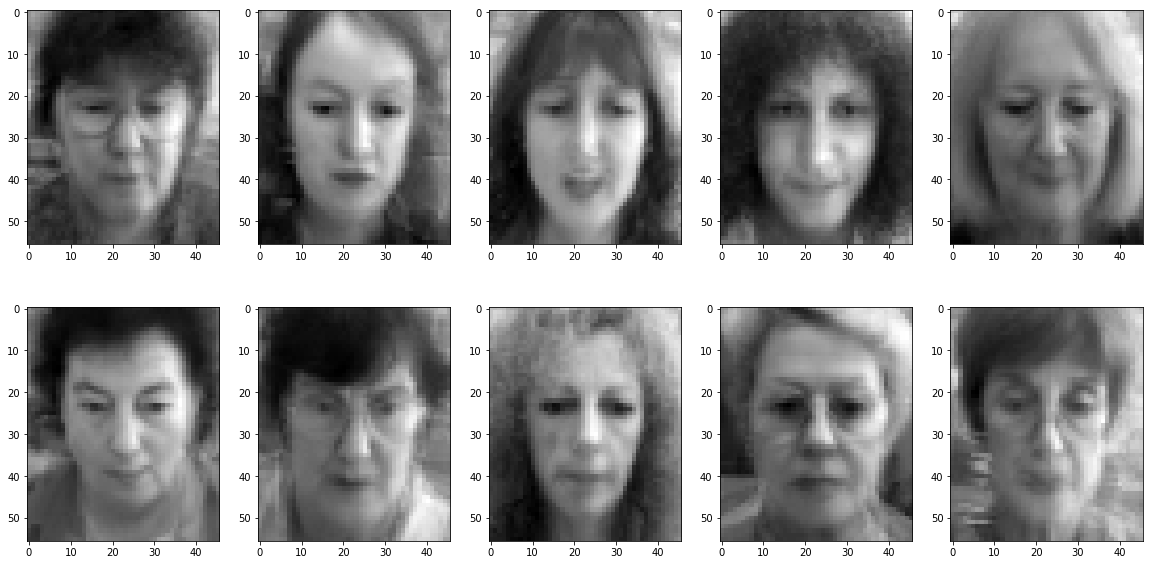

In [3]:
#Compute the Class Mean 
ClassMean = np.zeros((face_data.shape[0],52))
Num = np.zeros((52,1))
# print(ClassMean.shape)
# print(train_label.shape[1])
for i in range(train_label.shape[1]):
    ClassMean[:,train_label[2576,i].astype( 'int' )-1] = ClassMean[:,train_label[2576,i].astype( 'int' )-1] + train_label[: - 1,i]
    Num[train_label[2576,i].astype( 'int' )-1] = Num[train_label[2576,i].astype( 'int' )-1] + 1

print(ClassMean[:,1])

for i in range(ClassMean.shape[1]):
    ClassMean[:,i] = ClassMean[:,i] / Num[i]
 

print(ClassMean[:,1])

fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_face_img    = np.reshape( ClassMean[:,i], ( 46, 56 ) )
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()
fig.savefig("Q2meanface.png")

(2576, 364)
(2576,)


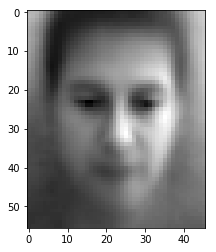

In [4]:
#Calculation of the mean face
print(train_label[: - 1].shape)
mean_face = np.mean( train_label[ : - 1 ], axis = 1) 
print(mean_face.shape)
mean_face_img = np.reshape(mean_face,(46,56))
plt.imshow( mean_face_img.T, cmap = 'gist_gray')

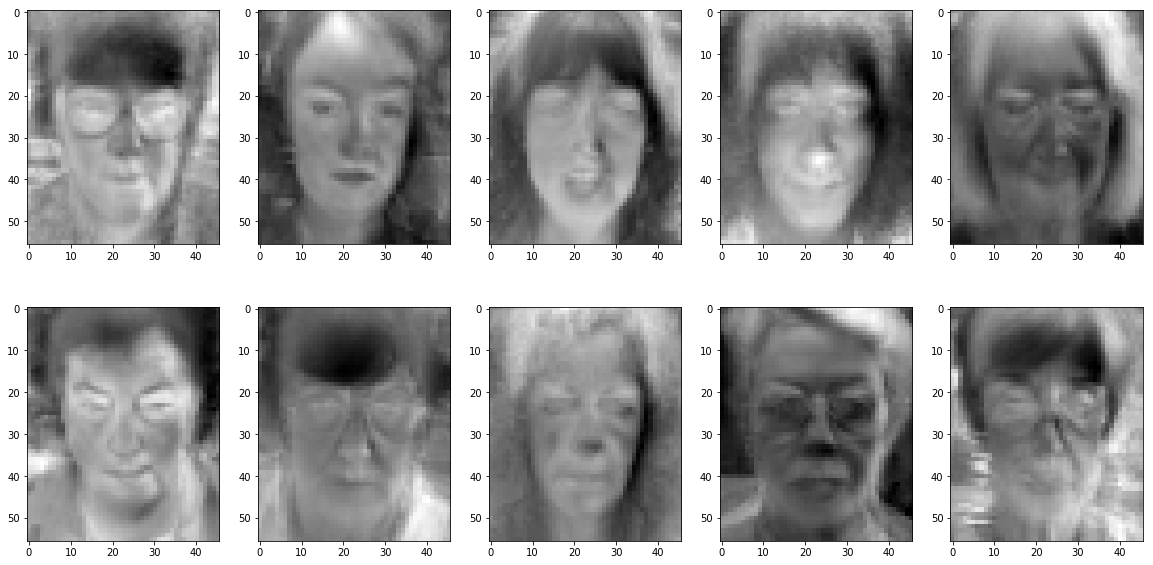

In [50]:
#Calculate Sb 
Sb = np.zeros((face_data.shape[0],52))
for i in range(Sb.shape[1]):
    Sb[:,i] = ClassMean[:,i] - mean_face
    
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_face_img    = np.reshape( Sb[:,i], ( 46, 56 ) )
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()
fig.savefig("Q2meanface.png")

Sb = np.matmul(Sb,Sb.T)


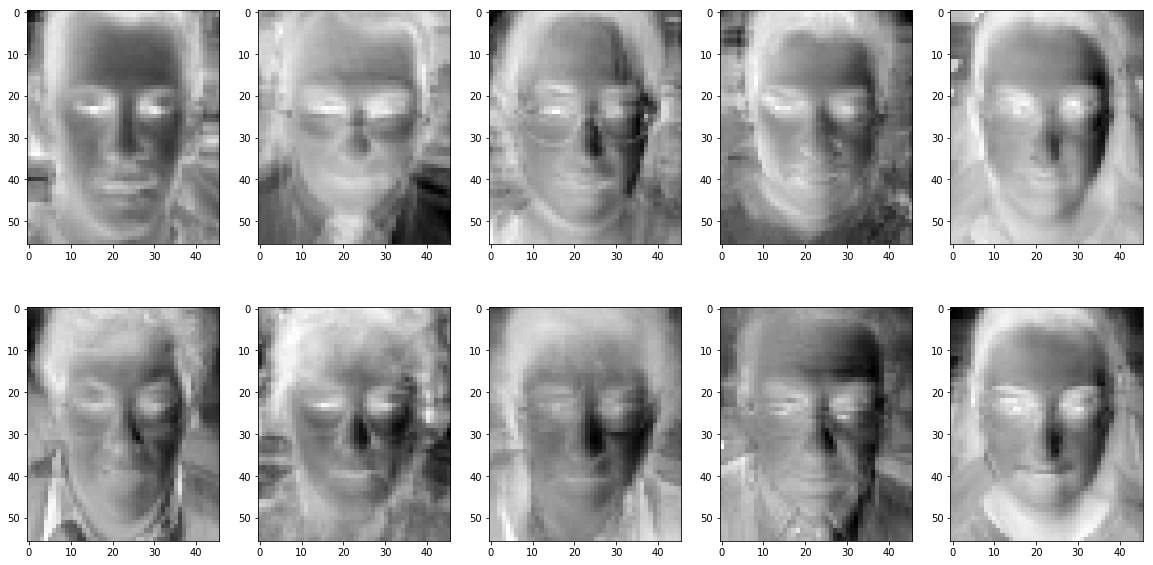

In [51]:
#Calculate Sw 
S = train_label
for i in range(S.shape[1]):
    S[: -1,i] = S[:-1,i] - ClassMean[:,S[-1 :,i].astype("int").item()-1]
    
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_face_img    = np.reshape( S[: -1,i], ( 46, 56 ) )
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()
fig.savefig("Q2meanface.png")

#Compute the Sj
Sj = { k : [] for k in range( 1, 53 ) }
Num = np.zeros((52,1))

for i in range(S.shape[1]):
    Sj[S[2576,i].astype("int")].append(S[:,i])  
    Num[S[2576,i].astype("int")-1] = Num[S[2576,i].astype("int")-1] + 1

Sw = np.zeros((2576,2576))
for i in range(len(Sj)):
    
    cov = np.matmul(np.asarray(Sj[i+1])[:, : -1].T,np.asarray(Sj[i+1])[:, : -1])
    
    Sw = Sw + ( 1 / (Num[i]) ) * cov


# PCA

In [52]:
rank_sw = np.linalg.matrix_rank( Sw )

In [53]:
rank_sb = np.linalg.matrix_rank( Sb )

In [54]:
phi_mat = train_label[ : -1 ]

for i in range( phi_mat.shape[ 1 ] ):
    phi_mat.T[ i ] = phi_mat.T[ i ] - mean_face
    
print( 'Phi_Mat Shape {}'.format( phi_mat.shape ) )

Phi_Mat Shape (2576, 364)


In [55]:
A = phi_mat

S = 1 / A.shape[ 1 ] * np.dot( A, A.T )
print( 'Covariance Matrix Shape {}'.format( S.shape ) )

Covariance Matrix Shape (2576, 2576)


In [56]:
hd_eig_vals, hd_eig_vecs = np.linalg.eig( S )

In [57]:
hd_eig_pairs = [ ( np.abs( hd_eig_vals[ i ] ), hd_eig_vecs[ :, i ] ) for i in range( len( hd_eig_vals ) ) ]
hd_eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

for i in range( 10 ):
    print( hd_eig_pairs[ i ][ 0 ] )

195866217.5849743
608679.9789229124
463874.15494851203
292394.6065853402
225291.57702792846
157312.69474303888
130048.81653027852
110632.93177433698
97359.59864363256
87500.56821915226


In [58]:
# M = phi_mat.shape[ 1 ] # Take (Number Of Data Faces) M largest eigenvectors

M = 30

M_eig_vecs = []

for i in range( M ):
    M_eig_vecs.append( hd_eig_pairs[ i ][ 1 ] )
    
print( 'M Largest Eigen Pairs: {}'.format( len( M_eig_vecs ) ) )

M Largest Eigen Pairs: 30


In [59]:
M_eig_vecs = np.asarray( M_eig_vecs )

M_eig_vecs.shape

(30, 2576)

In [60]:
sbcalc = np.dot( M_eig_vecs, np.dot( Sb, M_eig_vecs.T ) )

sbcalc.shape

(30, 30)

In [61]:
swcalc = np.dot( M_eig_vecs, np.dot( Sw, M_eig_vecs.T ) )

swcalc.shape

(30, 30)

In [62]:
swinv = np.linalg.inv( swcalc )

swinv.shape

(30, 30)

In [63]:
something = np.dot( swinv, sbcalc )

In [64]:
lda_eig_val, lda_eig_vecs = np.linalg.eig( something )

In [65]:
lda_eig_vecs.shape

(30, 30)

In [66]:
M_lda = 30

lda_eig_pairs = [ ( np.abs( lda_eig_val[ i ] ), lda_eig_vecs[ :, i ] ) for i in range( len( lda_eig_val ) ) ]
lda_eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

M_lda_vecs = []

for i in range( M_lda ):
    print( lda_eig_pairs[ i ][ 0 ] )
    M_lda_vecs.append( lda_eig_pairs[ i ][ 1 ] )
    
    

0.887564633884506
0.8728838452998461
0.7912895920404371
0.7745201792486428
0.6956361845087813
0.6881936376069683
0.6503783449723891
0.6187369624107861
0.5800994548841313
0.572102191674904
0.5248515625380711
0.4998998352888506
0.4873985834081017
0.4180160235734224
0.39270143561516846
0.37250984861870684
0.32857158881363746
0.27502284028529267
0.2431495793900078
0.2260771546079755
0.2008894858922166
0.16209110791915204
0.14304427488062085
0.11245731260398083
0.0973998426850675
0.08126141648945577
0.06825639004620457
0.0440737476193333
0.025653721004205265
0.0005002475318524744


In [67]:
M_lda_vecs = np.asarray( M_lda_vecs )

M_lda_vecs.shape

(30, 30)

In [68]:
wpcawlda = np.dot( M_lda_vecs, M_eig_vecs)

wpcawlda.shape

wpcawlda[ 0 ].real

array([ 0.00613076,  0.00738903,  0.00962357, ...,  0.0026854 ,
        0.00079724, -0.00670274])

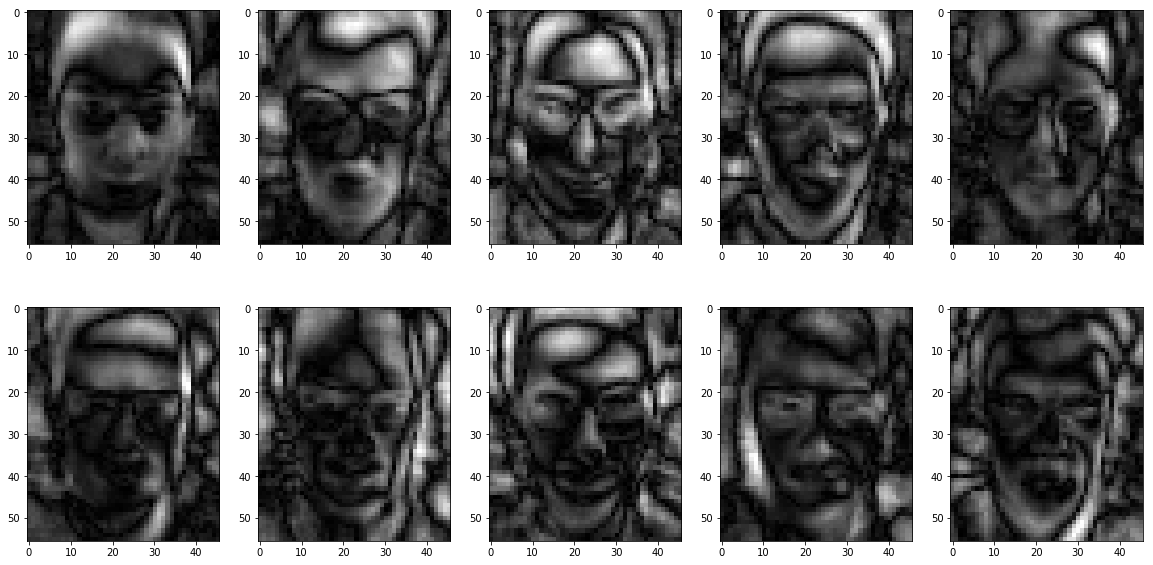

In [69]:
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    test_img = np.reshape(np.abs( wpcawlda[ i ].real ),(46,56))
    fig.add_subplot( 2, 5, i + 1 )
    plt.imshow( test_img.T, cmap = 'gist_gray')

In [70]:
wpcawlda.shape

(30, 2576)

In [71]:
training_data = train_label[ : -1 ]
training_label = train_label[ -1 : ]

training_data_projected = np.dot( wpcawlda, training_data )

training_label.shape

(1, 364)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

X = training_data_projected.T
Y = training_label.reshape( training_label.shape[ 1 ] ).astype( 'int' )

KNN = KNeighborsClassifier(n_neighbors = 1)

KNN.fit( X, Y )

/home/aufar/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [73]:
testing_data  = test_label[ : - 1 ]
testing_label = test_label[ -1 : ] 

testing_data_projected = np.dot( wpcawlda, testing_data )

X_test = testing_data_projected.T
 
Y_test = testing_label.reshape( testing_label.shape[ 1 ] ).astype( 'int' )
Y_test_predicted = KNN.predict( X_test )

/home/aufar/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


In [74]:
Accuracy = ( np.sum( Y_test_predicted == Y_test ) / Y_test.shape[ 0 ] * 100 )

print( 'Accuracy: {} %'.format( Accuracy ) )

Accuracy: 0.641025641025641 %


In [76]:
Y_test

array([22, 24, 38, 15,  5, 24,  8, 16, 32, 20, 13, 52, 33,  9,  5, 21, 21,
       46, 20, 43, 39, 17, 36, 49, 15, 27, 20, 34, 47, 36, 48, 13, 13, 27,
       42, 14, 49, 33, 15, 12, 37, 16, 37, 21, 38, 17, 36, 40, 12, 45,  7,
       44, 17, 37, 33, 34, 52,  3, 45, 28, 19, 48, 40, 47, 41,  4, 28, 22,
       34, 47,  2, 18, 26, 50, 48, 51, 23, 17, 51, 42, 50, 50, 34,  6, 23,
       14, 12, 42, 31,  9,  7, 42, 38, 19, 51, 33, 37, 28, 32, 40, 11, 42,
       26, 32, 14, 51, 40, 40, 31,  7, 10, 15, 14, 13, 15, 12, 29, 16, 18,
       19, 48,  2, 30, 37, 10, 27, 16, 23, 37, 25, 28,  2,  4, 42, 35, 19,
        9,  6, 35, 12, 11, 21, 35, 32, 45, 51, 48,  7, 43,  6, 33, 42, 22,
        3, 23, 18])